# Flow 

## 스케일이란?

디스케일러 라는 장치를 이용해 고압수를 이용해서 스케일을 벗겨낸다. 
스케일 = 산화피막 

열연강판과 후판은 비슷한듯 다른 듯. 같은 소재임 (슬래브) 
둘다 열간압연제품. 
변태점 이상의 온도 (탄소강 723, 순철 906)에서 압연한다. (압연온도의 동일성)

압연: 금속의 소서을 이용해서 고온의 금속재료를 회전하는 2개의 롤 사이를 통과시켜 여러가지 형태의 봉, 관, 판으로 가공하는 방법. 


- 디스케일링: 가열, 열간 압연 공정에서 재료표면에 생기는 스케일을 제거하는 방법 
**언제 사용하는지?**




# scale 분석

In [1]:
# 패키지 불러오기

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

#scaling
from sklearn.preprocessing import StandardScaler

# 샘플링 over-sampling
from imblearn.over_sampling import SMOTE


#분석도구
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm



#모델 평가
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report


#경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')


#한글 폰트 적용
matplotlib.rc("font", family = "Malgun Gothic")
# matplotlib("axes", unicode_minus = False)

## 데이터 불러오기

In [2]:
df_raw = pd.read_csv("C:/Users/user/Desktop/포스코 19기/빅데이터분석/dataset_ml/SCALE불량.csv", encoding = 'euc-kr')
print("data shape :", df_raw.shape)
df_raw.head()

data shape : (720, 21)


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


- rolling date는 각 7분 10초마다 새로운 데이터 생성됨. 

In [3]:
df_raw.tail()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
715,PB563502,2021-08-04:21:24:11,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2021-08-04:21:31:21,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2021-08-04:21:38:31,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2021-08-04:21:45:41,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조
719,PB563506,2021-08-04:21:52:51,양품,GL-A32,C0,16.09,3400,54209,69840,3호기,...,1186,82,1169,45,239,1155,957,적용,10,2조


## EDA

In [4]:
# 데이터 프레임이 가지고 있는 컬럼명 확인

df_raw.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THICK',
       'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_NO', 'FUR_NO_ROW',
       'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [5]:
df_raw.isnull().sum()

#결측치 없음

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [6]:
#info 

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [7]:
# 전체컬럼의 고윳값 개수확인

df_raw.nunique()

PLATE_NO             720
ROLLING_DATE         720
SCALE                  2
SPEC                  66
STEEL_KIND             9
PT_THICK             152
PT_WIDTH             343
PT_LENGTH            505
PT_WEIGHT            433
FUR_NO                 3
FUR_NO_ROW             2
FUR_HZ_TEMP          100
FUR_HZ_TIME          134
FUR_SZ_TEMP           70
FUR_SZ_TIME          115
FUR_TIME             153
FUR_EXTEMP            72
ROLLING_TEMP_T5      226
HSB                    2
ROLLING_DESCALING      6
WORK_GR                4
dtype: int64

In [8]:
# 기초 통계량

df_raw.describe()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [9]:
# 기초통계량

df_raw.describe(include = 'all')

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
count,720,720,720,720,720,720.000000,720.000000,720.000000,720.000000,720,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720,720.000000,720
unique,720,720,2,66,9,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4
top,PB563130,2021-08-03:09:55:41,양품,JS-SM490YB,C0,NaN,NaN,NaN,NaN,3호기,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,적용,NaN,4조
freq,1,1,489,84,503,NaN,NaN,NaN,NaN,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687,NaN,194
mean,NaN,NaN,NaN,NaN,NaN,29.267857,2807.127778,34323.269444,41481.777778,NaN,...,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,NaN,8.319444,NaN
std,NaN,NaN,NaN,NaN,NaN,19.152651,517.839690,13828.434837,24751.322015,NaN,...,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,NaN,1.623252,NaN
min,NaN,NaN,NaN,NaN,NaN,12.030000,1800.000000,7893.000000,7820.000000,NaN,...,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,NaN,5.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,16.090000,2466.000000,22663.000000,17757.500000,NaN,...,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,NaN,6.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.130000,2725.000000,37380.000000,36120.000000,NaN,...,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,NaN,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,40.000000,3125.000000,43735.000000,61120.000000,NaN,...,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,NaN,10.000000,NaN


### 시각화를 통한 분포 확인 

In [10]:
#히스토그램 : 양품과 불량 

def fur_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.xlabel(var)
    plt.ylabel("SCALE")
    plt.legend()

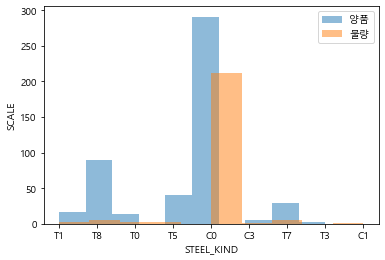

In [11]:
#강종에 대해서? 

fur_plot_hist(df_raw, "STEEL_KIND")

In [12]:
# 강종에 대해서

df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [13]:
#강종이 T1일때 

df_T1 = df_raw.loc[df_raw['STEEL_KIND']=='T1']
df_T1 = df_T1[['SCALE', 'STEEL_KIND', 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT']]
df_T1

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT
0,양품,T1,32.25,3707,15109,14180
1,양품,T1,32.25,3707,15109,14180
14,양품,T1,34.28,2207,30543,18140
15,불량,T1,50.46,2185,21767,37680
16,양품,T1,50.46,2200,21756,37920
17,양품,T1,50.46,2200,21756,37920
18,양품,T1,50.46,2200,21756,37920
19,양품,T1,50.46,2200,21756,37920
26,양품,T1,45.40,2150,18453,14140
27,양품,T1,45.40,2150,18453,14140


- 강종이 T1일때, 특정두께를 갖는 제품이 있다. 그때 갖는 Width와 length가 일정함.width가 기준과 맞지 않는 값들에서 불량이 난다. 
- 중량으로 알아봐도 됨. 중량 = 전체적 수치가 반영된 값이기 때문에
- 해당 가설이 맞는지 알아보기 위해 몇가지 종류를 더 찾아봄. 

In [14]:
#강종이 T0일때 

df_T0 = df_raw.loc[df_raw['STEEL_KIND']=='T0']
df_T0 = df_T0[['SCALE', 'STEEL_KIND', 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT']]
df_T0

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT
13,양품,T0,30.23,1940,34797,16020
398,양품,T0,22.15,2884,30690,61560
399,불량,T0,13.06,3328,33383,22780
400,양품,T0,15.08,3239,36930,28320
401,양품,T0,15.08,2724,37058,23900
428,불량,T0,40.35,2772,25978,45620
429,양품,T0,40.35,2772,25978,45620
434,양품,T0,40.34,2132,26513,35800
447,양품,T0,40.35,3145,18691,37240
457,양품,T0,50.41,3065,12334,14960


- 강종 T0에 대해서 같은 두께와 폭, 길이, 중량을 가짐에도 불량인 판이 있다. 
- 강종에 따른 두께는 관계가 없는건가? 
- 강종이 아니라 spec인거 같다. 각 치수의 spec이 있음 

In [15]:
#강종이 T7일때 

df_T0 = df_raw.loc[df_raw['STEEL_KIND']=='T7']
df_T0

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
397,PB563171,2021-08-03:07:25:11,양품,NV-D36-TM,T7,23.15,4075,22524,16680,2호기,...,1200,64,1159,58,237,1151,905,적용,8,3조
402,PB563176,2021-08-03:08:01:01,양품,LR-AH36-TM,T7,17.61,2795,37735,43740,2호기,...,1187,62,1151,66,246,1138,904,적용,10,2조
410,PB563184,2021-08-03:08:58:21,양품,GL-A36-TM,T7,36.30,2490,21986,31200,3호기,...,1189,53,1165,82,265,1160,882,적용,8,1조
430,PB563204,2021-08-03:11:21:41,양품,GL-A36-TM,T7,40.35,2481,22663,35620,1호기,...,1124,63,1121,107,269,1116,815,적용,6,1조
431,PB563205,2021-08-03:11:28:51,양품,GL-A36-TM,T7,40.35,2481,22663,35620,2호기,...,1162,85,1126,93,278,1119,802,적용,6,1조
432,PB563206,2021-08-03:11:36:01,양품,GL-A36-TM,T7,40.35,2481,22663,35620,3호기,...,1169,87,1138,83,286,1123,805,적용,6,3조
433,PB563207,2021-08-03:11:43:11,양품,GL-A36-TM,T7,40.35,2481,22663,35620,1호기,...,1138,65,1125,108,283,1111,817,적용,6,2조
435,PB563209,2021-08-03:11:57:31,양품,GL-A36-TM,T7,40.35,3081,23209,22650,3호기,...,1162,74,1136,101,289,1125,813,적용,6,2조
436,PB563210,2021-08-03:12:04:41,양품,NK-KD36-TM,T7,40.35,2751,23376,61110,1호기,...,1156,77,1128,126,304,1119,816,적용,6,2조
437,PB563211,2021-08-03:12:11:51,양품,NK-KD36-TM,T7,40.35,2641,23358,58620,2호기,...,1166,69,1118,141,308,1103,818,적용,6,2조


- 전체 칼럼에 대해 확인해보니 모든 치수가 같은 강종에 대해서는 작업호기가 달랐음. + HSB가 **미적용** 되었다.  

In [16]:
# HSB 미적용된 것?

df_hsb = df_raw.loc[df_raw['HSB']=='미적용']
df_hsb

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
71,PB562845,2021-08-01:16:28:51,불량,BV-EH36-TM,T8,73.71,2725,11009,17360,3호기,...,1142,93,1134,61,355,1126,847,미적용,6,1조
79,PB562853,2021-08-01:17:26:11,불량,GL-E36-TM,T8,75.71,2505,9249,13770,1호기,...,1142,82,1131,69,314,1125,847,미적용,6,4조
85,PB562859,2021-08-01:18:09:11,불량,AB/EH36-TM,T8,83.32,2560,10409,17430,1호기,...,1124,77,1124,99,342,1112,846,미적용,6,2조
112,PB562886,2021-08-01:21:22:41,불량,KR-B,C0,15.59,3105,54290,82520,3호기,...,1148,103,1153,91,356,1144,937,미적용,10,2조
163,PB562937,2021-08-02:03:28:11,불량,V42JBN3,C3,32.06,2200,37440,62190,1호기,...,1166,75,1166,72,316,1159,901,미적용,8,2조
246,PB563020,2021-08-02:13:23:01,불량,JS-SM490YB,C0,16.09,2559,37250,36120,1호기,...,1153,67,1151,44,269,1138,976,미적용,10,3조
250,PB563024,2021-08-02:13:51:41,불량,JS-SM490YB,C0,16.09,2512,37380,35580,3호기,...,1144,56,1150,59,273,1139,972,미적용,10,4조
290,PB563064,2021-08-02:18:38:21,불량,AB/A,C0,25.18,3379,32519,65160,3호기,...,1137,52,1167,66,260,1154,989,미적용,8,1조
303,PB563077,2021-08-02:20:11:31,불량,AB/B,C0,18.11,3599,34418,35220,2호기,...,1115,57,1160,71,236,1151,964,미적용,10,3조
327,PB563101,2021-08-02:23:03:31,불량,LR-A,C0,21.94,3813,31962,20990,2호기,...,1166,71,1165,61,242,1151,951,미적용,8,4조


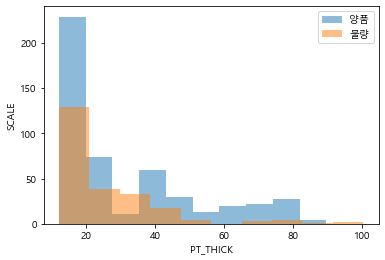

In [17]:
# 두께에 대해서 

fur_plot_hist(df_raw, "PT_THICK")

- 불량인 제품의 두께는 0~20 에서 제일 많다. 
- 양품인 제품의 두께는 25~40 사이에 없다. 
- 불량인 제품의 두께는 25~40 사이에도 있다. 

- 폭, 길이, 중량 

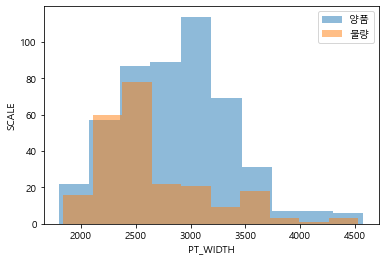

In [18]:
#폭에 대해서

fur_plot_hist(df_raw, "PT_WIDTH")

- 양품인 제품의 폭은 3000에서 3500에 가장 많다. 
- 불량인 제품은 2000~2600정도의 폭을 가진다. 

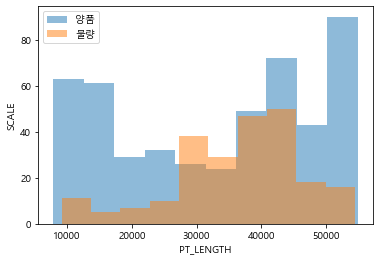

In [19]:
# 길이에 대해서

fur_plot_hist(df_raw, "PT_LENGTH")

- 불량인 제품의 길이는 30000에서 45000에서 많이 분포되어 있다. 

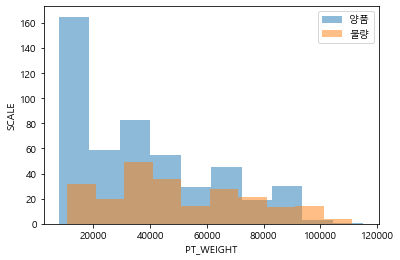

In [20]:
#중량에 대해서 

fur_plot_hist(df_raw, "PT_WEIGHT")

- 양품의 경우, 저중량의 제품이 많다. 
- 불량의 경우, 특정중량을 가진 불량제품은 많지 않아보인다. 고중량에서 양품보다 더 많은 불량률을 보인다. 

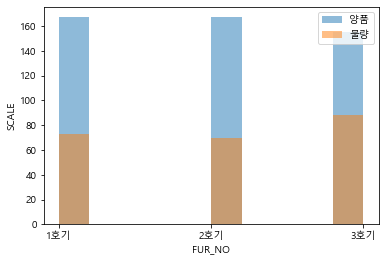

In [21]:
#가열로 호기에 대해서 

fur_plot_hist(df_raw, "FUR_NO")

- 각 호기 별로 불량이 발생하고, 3호기에서 가장 많은 불량이 발생한다. 

 가열로 호기(FUR_NO)에 대해서 :: 
같은 제품에 대해서 다른 세개의 집단이 생산함으로 anova test 가능 ! 
- 정말 유의미한 차이를 내는지 확인해 볼 필요가 있다. 

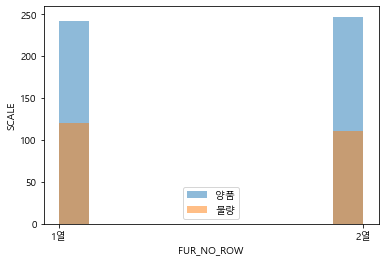

In [22]:
#가열로 작업순번

fur_plot_hist(df_raw, "FUR_NO_ROW")

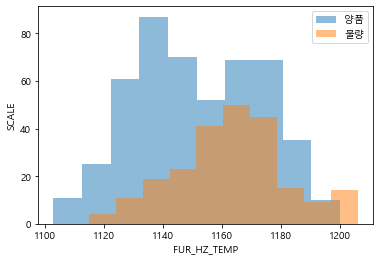

In [23]:
# 가열로 가열대 온도 

fur_plot_hist(df_raw, "FUR_HZ_TEMP")

- 양품의 경우 1130~1140의 온도가 가장 많다.
- 불량의 경우 1160~1180 사이의 온도가 가장 많다. 

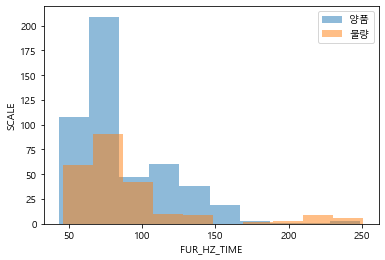

In [24]:
# 가열로 가열대 시간

fur_plot_hist(df_raw, "FUR_HZ_TIME")

- 불량은 가열대 시간이 높은 경우 (190~250)에서 발생하기도 한다. 

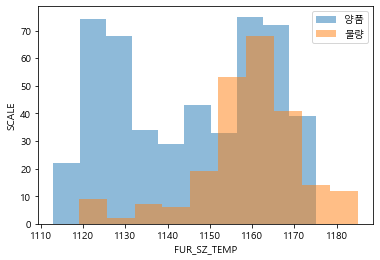

In [25]:
# 가열로 균열대 온도

fur_plot_hist(df_raw, "FUR_SZ_TEMP")

- 가열로 균열대 온도가 높은 경우 (1155~1180 정도일때) 불량이 많이 발생한다. 

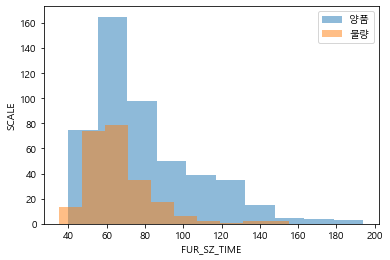

In [26]:
# 가열로 균열대 시간

fur_plot_hist(df_raw, "FUR_SZ_TIME")

- 가열로 균열대 시간이 작을때 불량이 많이 발생했다. 
(40~80)

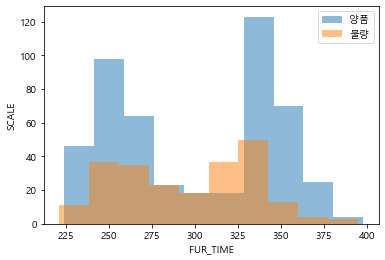

In [27]:
# 가열로 시간

fur_plot_hist(df_raw, "FUR_TIME")

- 양품보다 불량이 더 많이 나오는 시간은 가열로 시간이 275분 부터 325분까지다. 

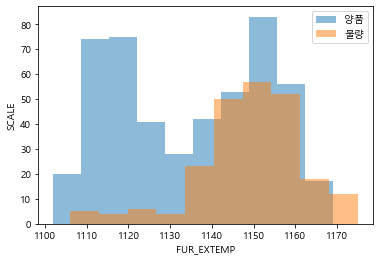

In [28]:
#추출온도

fur_plot_hist(df_raw, "FUR_EXTEMP")

- 양품은 1110과 1150 부근에서 많이 나온다. 
- 불량은 1140~ 1160에서 많이 나온다. 

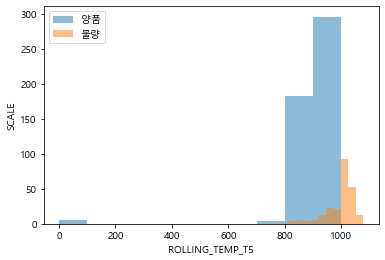

In [29]:
#압연온도

fur_plot_hist(df_raw, "ROLLING_TEMP_T5")

- 압연온도가 800~1000일때 양품이 많이 나온다. 
- 압연온도에 따른 불량은 매우 적으며, 1000도씨 근처의 고온에서 소량 발생한다.
- **0-100도 사이에서 이상치 발견**

In [30]:
df_raw.loc[df_raw['ROLLING_TEMP_T5']<200]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,PB562815,2021-08-01:12:53:51,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1123,0,적용,6,1조
184,PB562958,2021-08-02:05:58:41,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1169,64,1164,61,308,1155,0,적용,10,3조
185,PB562959,2021-08-02:06:05:51,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1163,57,1166,67,303,1158,0,적용,10,4조
494,PB563268,2021-08-03:19:00:21,양품,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,...,1133,89,1122,59,378,1112,0,적용,6,2조
495,PB563269,2021-08-03:19:07:31,양품,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,...,1130,92,1124,61,362,1116,0,적용,6,3조
496,PB563270,2021-08-03:19:14:41,양품,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,...,1119,109,1117,76,383,1107,0,적용,6,3조


#### ROLLING_TEMP_T5 이상치 대체

In [31]:
df_raw["ROLLING_TEMP_T5"].replace(0, df_raw["ROLLING_TEMP_T5"].mean(), inplace = True)

In [32]:
df_raw.loc[df_raw['ROLLING_TEMP_T5']==0]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR


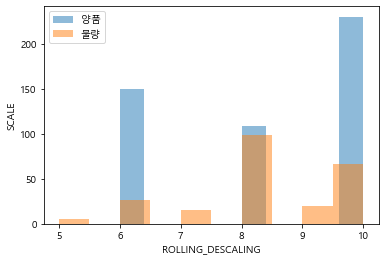

In [33]:
#압연중 descaling 횟수

fur_plot_hist(df_raw, "ROLLING_DESCALING")

- 압연 중 descaling횟수가 5회, 7회, 9회 일 경우 양품은 하나도 발생하지 않고, 불량만 발생한다. 
- 8회일때는 양품도 발생하지만, 그만큼 불량품도 발생한다. 

## 교차표

- 범주형 데이터에 대해서 각 불량과 양품의 정도를 확인해보기 위해 크로스탭을 이용한다. 

In [34]:
#교차표 

def fur_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
    

In [35]:
fur_print_crosstab(df_raw, "FUR_NO_ROW")

FUR_NO_ROW   1열   2열
SCALE               
불량          120  111
양품          242  247

FUR_NO_ROW     1열    2열
SCALE                  
불량          0.331  0.31
양품          0.669  0.69


- 작업열에 대해서는 큰 차이를 보이지 않는다. 

In [36]:
# 제품 규격- ??

fur_print_crosstab(df_raw, "SPEC")

SPEC   A131-DH36TM  A283-C  A516-60  A709-36  AB/A  AB/AH32  AB/B  AB/EH32-TM  \
SCALE                                                                           
불량               1       5        1        0     4        1     3           0   
양품               0       1        1        1     3        4     3           2   

SPEC   AB/EH36-TM  API-2W-50T  ...  NV-A32-TM  NV-A36-TM  NV-B  NV-D32-TM  \
SCALE                          ...                                          
불량              1           0  ...          1          0     2          0   
양품             16           2  ...          2          2     1          4   

SPEC   NV-D36-TM  NV-E32-TM  NV-E36-TM  PILAC-BT33  SA283-C  V42JBN3  
SCALE                                                                 
불량             1          0          0           2       10        1  
양품             4          2          5          38       11        3  

[2 rows x 66 columns]

SPEC   A131-DH36TM  A283-C  A516-60  A709-36   AB/A  AB/AH

- 제품 규격을 나타내는 SPEC컬럼의 고윳값은 66개로, 그 각각의 불량과 양품의 비율을 나타내는 것은 큰 의미가 없을 것으로 판단해서, 분석에서 제외하도록 한다. 

In [37]:
# 강종에 대해서 

fur_print_crosstab(df_raw, "STEEL_KIND")

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          291   0   6  14  16   2  41  29  90

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053
양품          0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947


C0에 대해서 불량과 양품의 비율이 반반에 가깝게 높음. C1은 1개 있지만 불량. 



In [38]:
#가열로 호기

fur_print_crosstab(df_raw, "FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      167  167  155

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.304  0.295  0.362
양품      0.696  0.705  0.638


In [39]:
# HSB 적용

fur_print_crosstab(df_raw, "HSB")

HSB    미적용   적용
SCALE          
불량      33  198
양품       0  489

HSB    미적용     적용
SCALE            
불량     1.0  0.288
양품     0.0  0.712


- HSB를 적용하지 않은 경우는 100% 불량이 발생했다. 이는 후에 중요한 인자가 될 수 있을 것으로 유추한다. 
- **HSB란??**  
    : 후판공장에서 가열중 발생되는 1차 Scale 제거장치 

In [40]:
# 작업조 

fur_print_crosstab(df_raw, "WORK_GR")

WORK_GR   1조   2조   3조   4조
SCALE                      
불량        67   45   54   65
양품       122  120  118  129

WORK_GR     1조     2조     3조     4조
SCALE                              
불량       0.354  0.273  0.314  0.335
양품       0.646  0.727  0.686  0.665


- 각 작업조에 대해서 정규화를 했을때 4조의 불량 률은 대체로 비슷한 경향을 보인다. 0.273의 불량률을 가지는 2조가 가장 효율적인 업무를 진행하고 있다고 판단할수는 있지만, 네 조가 대체로 모두 비슷한 불량률을 보임으로 특정한 작업조에 의해 불량이 발생된다고 보기 어렵다고 판단했다. 

<AxesSubplot:title={'center':'작업조에 따른 불량률'}, ylabel='None'>

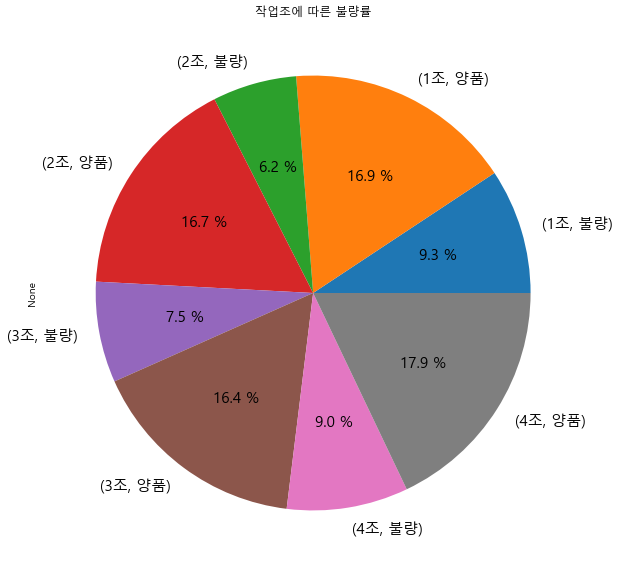

In [41]:
plt.figure(figsize = (13,10))
plt.title('작업조에 따른 불량률')
df_count = df_raw.groupby(["WORK_GR", "SCALE"]).size()
df_count.plot.pie(y= "SCALE", autopct = "%.1f %%", textprops = {'size':15})

- 목표변수 : 범주형 -> 숫자형으로 만들어주기



df_raw["SCALE"] = np.where(df_raw["SCALE"]=="양품", 0, 1)
df_raw["SCALE"].head()

- 전체 변수들을 모두 숫자형으로 바꿀 필요는 없음으로 우선 목표변수를 숫자형으로 바꿔준다. 
- 양품은 0, 불량은 1로 변경됨을 확인할 수 있다. 

In [42]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934.0,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937.0,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889.0,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885.0,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873.0,적용,8,1조


# 통계적 분석

- 작업호기에서 대해서 다른 두 호기에 비해 높은 불량률을 보였던 3호기의 불량률이 유의미한가에 대해서 분석한다. 
- 2 proportion test 진행 

In [43]:
#2호기의 불량인 횟수
len(df_raw["FUR_NO"].loc[(df_raw['SCALE']==1) & (df_raw["FUR_NO"]=="2호기")])


0

In [44]:
#가열로 호기

fur_print_crosstab(df_raw, "FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      167  167  155

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.304  0.295  0.362
양품      0.696  0.705  0.638


In [45]:
from scipy import stats
# import scipy.stats
from statsmodels.stats.proportion import proportions_ztest

In [46]:
#2호기 전체 횟수 : 237 불량의 횟수 : 70
#3호기 전체 횟수 : 243 불량의 횟수 : 88

count=np.array([70, 88])
nobs = np.array([237, 243])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportion test\n------------------")
print("z       : {0:0.3f}".format(stat))
print("p value :  {0:0.3f}".format(pval))

2 Proportion test
------------------
z       : -1.557
p value :  0.120


p value가 0.05 이상임으로 두 공장의 불량률은 차이가 있다고 할 수 없다. 

## 파생변수 만들기

### 가열로 균열대 소재온도 - 가열로 추출 온도의 차이
- 가열로 균열대에서는 불을 줄이고 내부의 온도와 밖의 온도를 맞춰주기 위해 뜸을 들이는 과정이 생긴다. 
- 추출 온도: 가열로를 나와서 온도. 
- 따라서 추출온도와 차이가 큰지, 클때의 스케일 발생량은 어떤지 알아보고자 파생변수 생성. 

In [47]:
# FUR_SZ_TEMP - FUR_EXTEMP

df_raw["dif_temp"] =df_raw["FUR_SZ_TEMP"]-df_raw["FUR_EXTEMP"]

In [48]:
#dif_temp

fur_print_crosstab(df_raw, "dif_temp")

dif_temp  5   6   7   8   9   10  11  12  13  14  15
SCALE                                               
불량        17  24  20  16  31  20  23  23  24  15  18
양품        36  32  44  56  51  43  45  49  38  47  48

dif_temp     5      6      7      8      9      10     11     12     13  \
SCALE                                                                     
불량        0.321  0.429  0.312  0.222  0.378  0.317  0.338  0.319  0.387   
양품        0.679  0.571  0.688  0.778  0.622  0.683  0.662  0.681  0.613   

dif_temp     14     15  
SCALE                   
불량        0.242  0.273  
양품        0.758  0.727  


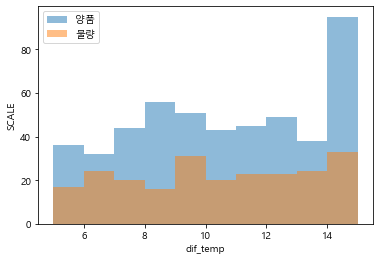

In [49]:
#온도차에 따른 불량정도

fur_plot_hist(df_raw, "dif_temp")

온도차이가 크다고해서 스케일 발생량이 큰거 같지는 않다. 

### 가열로 가열대 시간 + 가열로 균열대 시간
- 가열로에 들어간 시간이 짧으면 불랑이 생길 확률이 높다? 
- 적절한 스케일제거를 거치지 못했을 수 있다? 


In [50]:
#sum_time = FUR_HZ_TIME + FUR_SZ_TIME

df_raw["sum_FUR_time"] = df_raw["FUR_HZ_TIME"] + df_raw["FUR_SZ_TIME"]
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,dif_temp,sum_FUR_time
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1133,59,282,1125,934.0,적용,8,2조,8,175
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1135,53,283,1120,937.0,적용,8,2조,15,175
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1121,55,282,1106,889.0,적용,8,3조,15,171
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1127,68,316,1113,885.0,적용,8,3조,14,193
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1128,48,314,1118,873.0,적용,8,1조,10,182


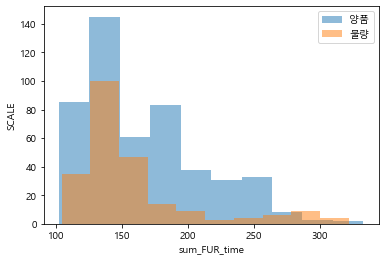

In [51]:
#sum_FUR_time

fur_plot_hist(df_raw, "sum_FUR_time")

In [52]:
# 가열로 시간 FUR_TIME

df_raw["dif_FUR_time"] = df_raw["FUR_TIME"] - df_raw["sum_FUR_time"]
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,dif_temp,sum_FUR_time,dif_FUR_time
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,59,282,1125,934.0,적용,8,2조,8,175,107
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,53,283,1120,937.0,적용,8,2조,15,175,108
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,55,282,1106,889.0,적용,8,3조,15,171,111
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,68,316,1113,885.0,적용,8,3조,14,193,123
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,48,314,1118,873.0,적용,8,1조,10,182,132


In [53]:
df_raw.loc[df_raw["dif_FUR_time"]<=0]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,dif_temp,sum_FUR_time,dif_FUR_time


- 가열로 시간이 무조건 더 크다. (당연한 이야기이긴 하네,,)

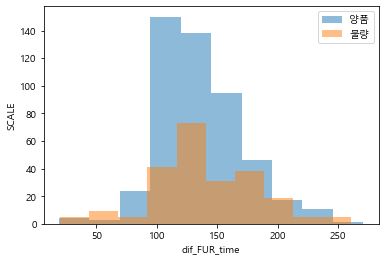

In [54]:
#sum_FUR_time

fur_plot_hist(df_raw, "dif_FUR_time")

### 넓이 변수 생성

In [55]:
df_raw['PT_AREA'] = df_raw['PT_WIDTH'] * df_raw['PT_LENGTH']
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,dif_temp,sum_FUR_time,dif_FUR_time,PT_AREA
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,282,1125,934.0,적용,8,2조,8,175,107,56009063
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,283,1120,937.0,적용,8,2조,15,175,108,56009063
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,282,1106,889.0,적용,8,3조,15,171,111,69416039
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,316,1113,885.0,적용,8,3조,14,193,123,69416039
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,314,1118,873.0,적용,8,1조,10,182,132,41308732


### 상관분석하기

In [56]:
#목표변수 : 범주형 -> 숫자형으로 만들어주기

df_raw["SCALE"] = np.where(df_raw["SCALE"]=="양품", 0, 1)
df_raw["SCALE"].head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int32

In [57]:
cont_corr = df_raw.corr()
cont_corr

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,dif_temp,sum_FUR_time,dif_FUR_time,PT_AREA
SCALE,1.000000,-0.124858,-0.206021,0.100475,0.218741,0.247670,0.064466,0.374809,-0.255138,-0.049214,0.374679,0.551898,-0.006955,-0.034230,-0.093731,0.055126,-0.011716
PT_THICK,-0.124858,1.000000,-0.313151,-0.862618,-0.397391,-0.523926,0.171835,-0.694770,0.269365,0.413009,-0.687565,-0.497441,-0.836631,0.022764,0.287685,0.145182,-0.843509
PT_WIDTH,-0.206021,-0.313151,1.000000,0.119726,0.031009,0.180024,-0.126002,0.227296,-0.051361,-0.393200,0.216078,-0.111239,0.337540,0.044322,-0.128204,-0.315697,0.469532
PT_LENGTH,0.100475,-0.862618,0.119726,1.000000,0.451815,0.473111,-0.090338,0.645402,-0.230159,-0.251950,0.641330,0.432096,0.809280,-0.036460,-0.201375,-0.057041,0.921544
PT_WEIGHT,0.218741,-0.397391,0.031009,0.451815,1.000000,0.153331,0.007292,0.359513,-0.193112,-0.057776,0.361377,0.419302,0.238986,-0.044457,-0.103594,0.056866,0.408233
FUR_HZ_TEMP,0.247670,-0.523926,0.180024,0.473111,0.153331,1.000000,-0.112438,0.772907,-0.327912,-0.348223,0.758185,0.354927,0.470899,0.013862,-0.274103,-0.083978,0.468379
FUR_HZ_TIME,0.064466,0.171835,-0.126002,-0.090338,0.007292,-0.112438,1.000000,-0.210175,0.067994,0.483407,-0.196404,0.004005,-0.152363,-0.060837,0.825199,-0.425163,-0.116503
FUR_SZ_TEMP,0.374809,-0.694770,0.227296,0.645402,0.359513,0.772907,-0.210175,1.000000,-0.566177,-0.477177,0.985245,0.657534,0.648646,-0.007148,-0.485888,0.019272,0.625879
FUR_SZ_TIME,-0.255138,0.269365,-0.051361,-0.230159,-0.193112,-0.327912,0.067994,-0.566177,1.000000,0.490728,-0.565912,-0.478913,-0.285524,0.051307,0.619643,-0.165958,-0.184942
FUR_TIME,-0.049214,0.413009,-0.393200,-0.251950,-0.057776,-0.348223,0.483407,-0.477177,0.490728,1.000000,-0.467894,-0.209493,-0.366708,-0.009684,0.658125,0.398345,-0.357797


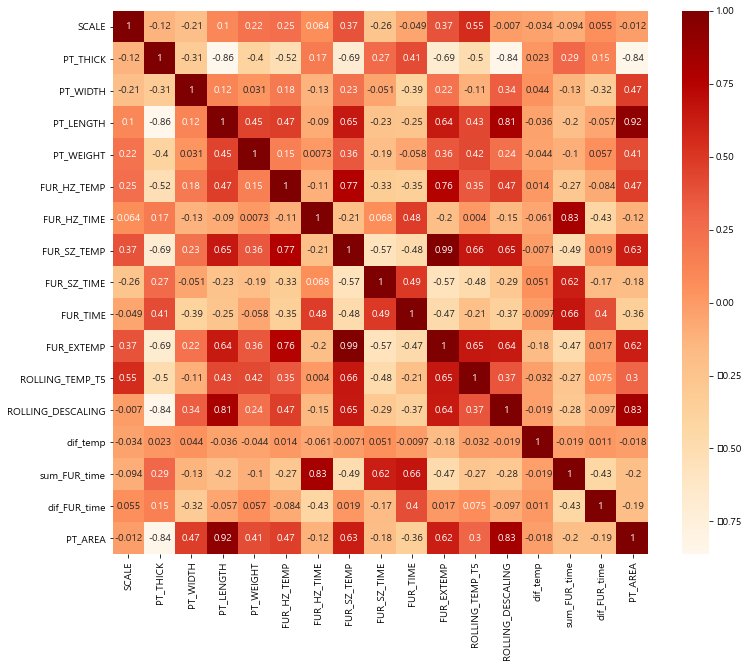

In [58]:
plt.figure(figsize = (12,10))
sns.heatmap(cont_corr, annot=True, cmap='OrRd');

# 모델링

In [59]:
#불 필요한 칼럼 삭제 
df_raw = df_raw.drop(columns = ["PLATE_NO", "ROLLING_DATE", "STEEL_KIND", "SPEC", "FUR_NO", "FUR_NO_ROW", "WORK_GR"])
df_raw.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,dif_temp,sum_FUR_time,dif_FUR_time,PT_AREA
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934.0,적용,8,8,175,107,56009063
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937.0,적용,8,15,175,108,56009063
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889.0,적용,8,15,171,111,69416039
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885.0,적용,8,14,193,123,69416039
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873.0,적용,8,10,182,132,41308732


### 데이터 분할

In [60]:
df_raw = pd.get_dummies(df_raw)

In [61]:
train = df_raw.drop('SCALE',axis=1,inplace=False)
target = df_raw['SCALE']

In [62]:
#데이터 분할

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(train, target, test_size = 0.3, random_state = 16, shuffle = True, stratify = target)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (504, 18)
train data Y size : (504,)
test data X size : (216, 18)
test data Y size : (216,)


## 의사결정나무

In [63]:
#기본 조건으로 모델 생성

tree_uncustomized = DecisionTreeClassifier(random_state=16)
tree_uncustomized.fit(df_train_x, df_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.935


#### 최대깊이 변경

In [64]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=16)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.889,0.894
1,2,0.931,0.940
2,3,0.960,0.968
3,4,0.970,0.968
4,5,0.972,0.972
5,6,0.976,0.949
6,7,0.978,0.954
7,8,0.982,0.954
8,9,0.984,0.954
9,10,0.986,0.954


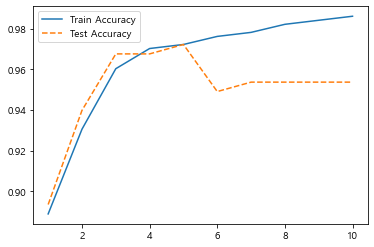

In [65]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 깊이는 5로 설정

#### 리프노드 제한

In [82]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=5, random_state=16)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.980,0.991
1,20,0.948,0.954
2,30,0.897,0.889
3,40,0.889,0.894
4,50,0.889,0.894
5,60,0.889,0.894
6,70,0.889,0.894
7,80,0.889,0.894
8,90,0.889,0.894
9,100,0.889,0.894


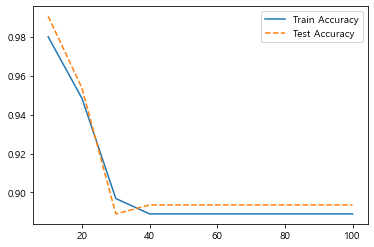

In [83]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 리프노드는 10로 설정

#### 스플릿 노드 변경

In [76]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 20 for n_split in range(1, 11)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 10, max_depth = 5, random_state=16)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.98,0.991
1,40,0.98,0.991
2,60,0.98,0.991
3,80,0.98,0.991
4,100,0.98,0.991
5,120,0.98,0.991
6,140,0.98,0.991
7,160,0.98,0.991
8,180,0.98,0.991
9,200,0.96,0.968


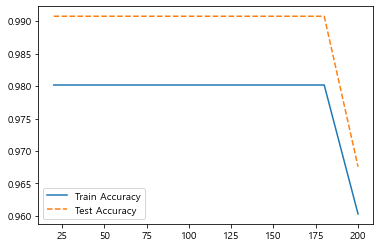

In [77]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### 최종모델

In [90]:
tree_final = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, min_samples_split = 20 ,random_state = 16)
tree_final.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Accucary on training set: 0.980
Accucary on test set: 0.991


In [81]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.991

Confusion matrix: 
[[147   0]
 [  2  67]]
              precision    recall  f1-score   support

           0      0.987     1.000     0.993       147
           1      1.000     0.971     0.985        69

    accuracy                          0.991       216
   macro avg      0.993     0.986     0.989       216
weighted avg      0.991     0.991     0.991       216



#### 변수 중요도

In [72]:
# feature_importances_: 설명변수의 중요도
# 변수명 저장
v_feature_name = df_train_x.columns

#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)


,Feature,Importance
10,ROLLING_TEMP_T5,0.712
16,HSB_미적용,0.189
6,FUR_SZ_TEMP,0.099
0,PT_THICK,0.000
15,PT_AREA,0.000
14,dif_FUR_time,0.000
13,sum_FUR_time,0.000
12,dif_temp,0.000
11,ROLLING_DESCALING,0.000
9,FUR_EXTEMP,0.000


Text(0, 0.5, '변수')

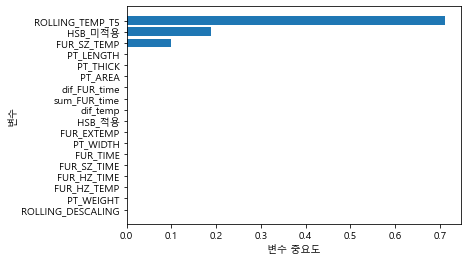

In [73]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

## 랜덤포레스트

In [113]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf = RandomForestClassifier(random_state=1234)
rf.fit(df_train_x, df_train_y)
# 훈련 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf.score(df_train_x, df_train_y)))
# 테스트 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.968


#### n_estimators

In [87]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 1~16
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_n.round(3)

## n_estimators = 40

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.958
1,20,1.000,0.958
2,30,1.000,0.972
3,40,1.000,0.972
4,50,1.000,0.972
5,60,1.000,0.972
6,70,1.000,0.972
7,80,1.000,0.972
8,90,1.000,0.968
9,100,1.000,0.968


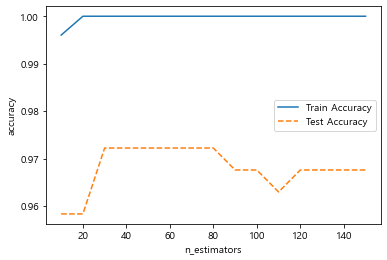

In [88]:

# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()


- n_estimators = 120

#### oob그래프

Text(0.5, 0, 'n_estimators')

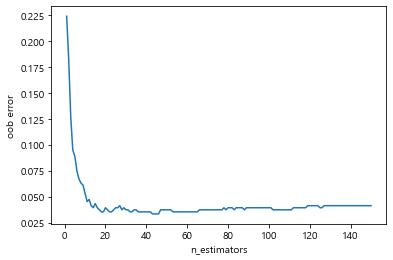

In [89]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

#### 최대 깊이 

In [114]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 120, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_depth.round(3)


,Depth,TrainAccuracy,TestAccuracy
0,1,0.823,0.824
1,2,0.929,0.935
2,3,0.933,0.935
3,4,0.956,0.958
4,5,0.962,0.968
5,6,0.978,0.968
6,7,0.982,0.968
7,8,0.994,0.968
8,9,0.998,0.968
9,10,1.000,0.968


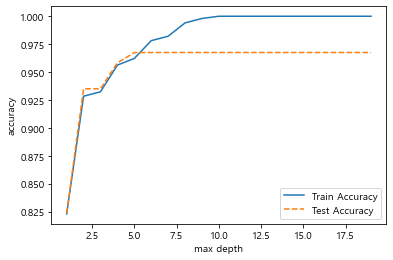

In [115]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()


- max depth =5

#### 리프노드 조절

In [116]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth = 5, n_estimators = 120, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_leaf.round(3)



,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.942,0.926
1,20,0.889,0.889
2,30,0.885,0.889
3,40,0.885,0.889
4,50,0.883,0.889
5,60,0.879,0.889
6,70,0.873,0.875
7,80,0.851,0.856
8,90,0.831,0.819
9,100,0.815,0.824


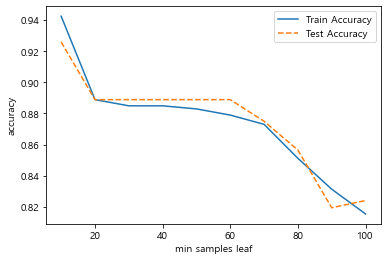

In [117]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

- min samples leaf =5

#### 스플릿 노드 조절

In [120]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 20)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split,
                                min_samples_leaf = 10, max_depth = 5, n_estimators = 120, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_split.round(3)



,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.942,0.926
1,20,0.942,0.926
2,30,0.944,0.926
3,40,0.946,0.926
4,50,0.938,0.926
5,60,0.935,0.926
6,70,0.940,0.926
7,80,0.935,0.926
8,90,0.931,0.931
9,100,0.925,0.931


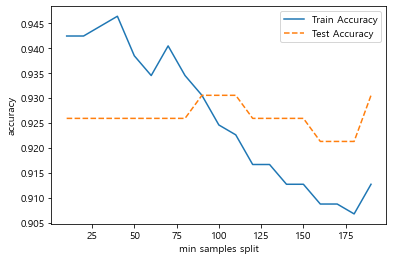

In [121]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

- 스플릿 노드 20

#### 최종모델 및 평가

In [123]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 20, max_depth = 5, n_estimators = 120, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

rf_final

Accuracy on training set: 0.942
Accuracy on test set: 0.926

Confusion matrix: 
[[147   0]
 [ 16  53]]
              precision    recall  f1-score   support

           0      0.902     1.000     0.948       147
           1      1.000     0.768     0.869        69

    accuracy                          0.926       216
   macro avg      0.951     0.884     0.909       216
weighted avg      0.933     0.926     0.923       216



RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=120, random_state=1234)

#### 변수중요도

In [124]:
# feature_importances_: 설명변수의 중요도
# 변수명 저장
v_feature_name = df_train_x.columns

#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)



,Feature,Importance
10,ROLLING_TEMP_T5,0.401
6,FUR_SZ_TEMP,0.092
9,FUR_EXTEMP,0.090
1,PT_WIDTH,0.070
0,PT_THICK,0.048
15,PT_AREA,0.041
16,HSB_미적용,0.041
11,ROLLING_DESCALING,0.033
2,PT_LENGTH,0.033
4,FUR_HZ_TEMP,0.027


Text(0, 0.5, '변수')

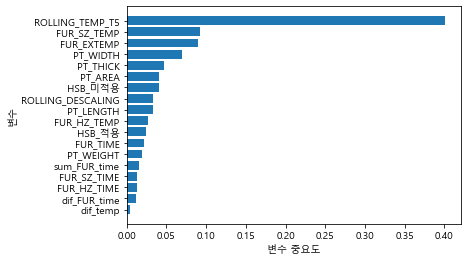

In [125]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

## 그래디언트 부스팅

In [126]:
gb = GradientBoostingClassifier(random_state=1234)
gb.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(gb.score (df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(gb.score (df_test_x, df_test_y)))

Accuracy on train set: 1.000
Accuracy on test set: 0.977


#### n-estimators

In [127]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.960,0.968
1,20,0.972,0.968
2,30,0.978,0.968
3,40,0.984,0.968
4,50,0.990,0.972
5,60,0.992,0.972
6,70,0.998,0.972
7,80,1.000,0.972
8,90,1.000,0.977
9,100,1.000,0.977


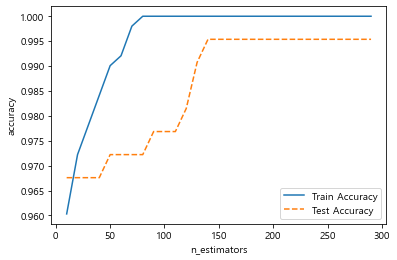

In [128]:
# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

#### 학습률 변경

In [129]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, n_estimators = 150, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

# LearningRate별 정확도 테이블
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.995
1,0.2,1.0,0.995
2,0.3,1.0,0.995
3,0.4,1.0,0.995
4,0.5,1.0,0.991
5,0.6,1.0,0.986
6,0.7,1.0,0.991
7,0.8,1.0,0.991
8,0.9,1.0,0.995


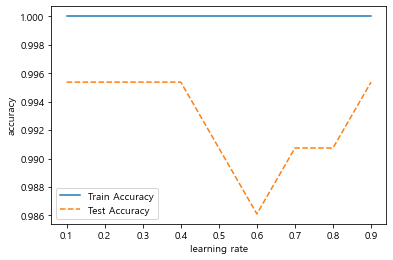

In [130]:
# LearningRate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

- 학습률 0.4

#### 최대 깊이 변경

In [132]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                                    n_estimators = 150, learning_rate = 0.4,random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,1.0,0.981
1,2,1.0,0.991
2,3,1.0,0.995
3,4,1.0,0.995
4,5,1.0,0.995
5,6,1.0,0.991
6,7,1.0,0.991
7,8,1.0,0.995
8,9,1.0,0.995
9,10,1.0,1.000


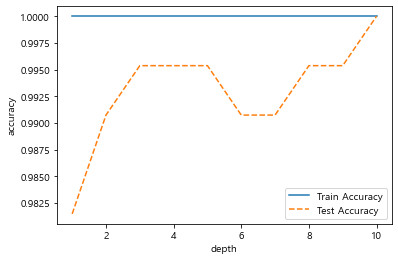

In [133]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

최대 깊이 5

#### 리프노드 수 조절

In [149]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 1 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth = 5, n_estimators = 150, learning_rate = 0.4, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,1.0,0.995
1,2,1.0,0.995
2,3,1.0,0.995
3,4,1.0,0.995
4,5,1.0,0.995
5,6,1.0,0.991
6,7,1.0,0.995
7,8,1.0,0.991
8,9,1.0,0.991
9,10,1.0,0.991


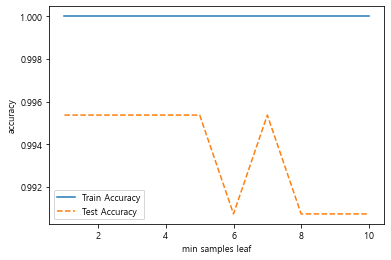

In [150]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

- 리프노드 수 5

#### 스플릿 노드 수 조절

In [146]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 15)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, min_samples_leaf = 5,
                                    max_depth = 4,n_estimators = 150, learning_rate = 0.7, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,1.0,0.995
1,20,1.0,0.995
2,30,1.0,0.995
3,40,1.0,0.995
4,50,1.0,0.995
5,60,1.0,0.995
6,70,1.0,0.995
7,80,1.0,0.995
8,90,1.0,0.995
9,100,1.0,0.995


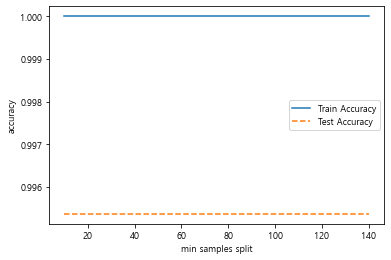

In [147]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

-스플릿 노드 50

#### 최종 모델 및 평가

In [173]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf = 5, max_depth = 5, n_estimators = 150, min_samples_split=50,
                                      learning_rate = 0.4, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

gb_final

Accuracy on training set: 1.000
Accuracy on test set: 0.995

Confusion matrix: 
[[147   0]
 [  1  68]]
              precision    recall  f1-score   support

           0      0.993     1.000     0.997       147
           1      1.000     0.986     0.993        69

    accuracy                          0.995       216
   macro avg      0.997     0.993     0.995       216
weighted avg      0.995     0.995     0.995       216



GradientBoostingClassifier(learning_rate=0.4, max_depth=5, min_samples_leaf=5,
                           min_samples_split=50, n_estimators=150,
                           random_state=1234)

#### 변수중요도

In [139]:
# feature_importances_: 설명변수의 중요도
# 변수명 저장
v_feature_name = df_train_x.columns

#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)



,Feature,Importance
10,ROLLING_TEMP_T5,0.575
16,HSB_미적용,0.147
6,FUR_SZ_TEMP,0.127
11,ROLLING_DESCALING,0.098
9,FUR_EXTEMP,0.016
13,sum_FUR_time,0.012
1,PT_WIDTH,0.009
8,FUR_TIME,0.007
17,HSB_적용,0.004
2,PT_LENGTH,0.003


Text(0, 0.5, '변수')

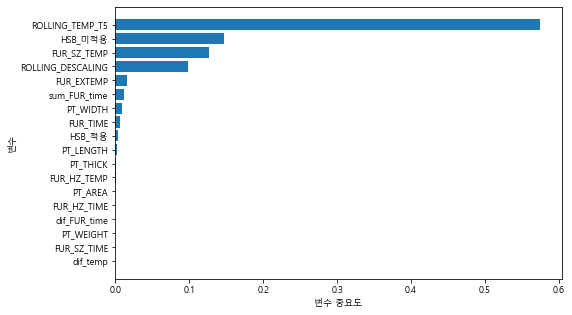

In [143]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates = range(len(df_importance))
matplotlib.rc('font', size=9) 
plt.figure(figsize=(8, 5))       
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')
                

# 모델 평가

In [156]:
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [157]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100 

models = ['DT','RF','GD']
mse,rmse,mae,mape =[],[],[],[]

### 예측 및 평가

In [158]:
#의사결정나무

dt_y_pred = tree_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [159]:
# 랜덤포레스트

rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [160]:
# 그래디언트 부스팅

gb_y_pred = gb_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

### 시각화

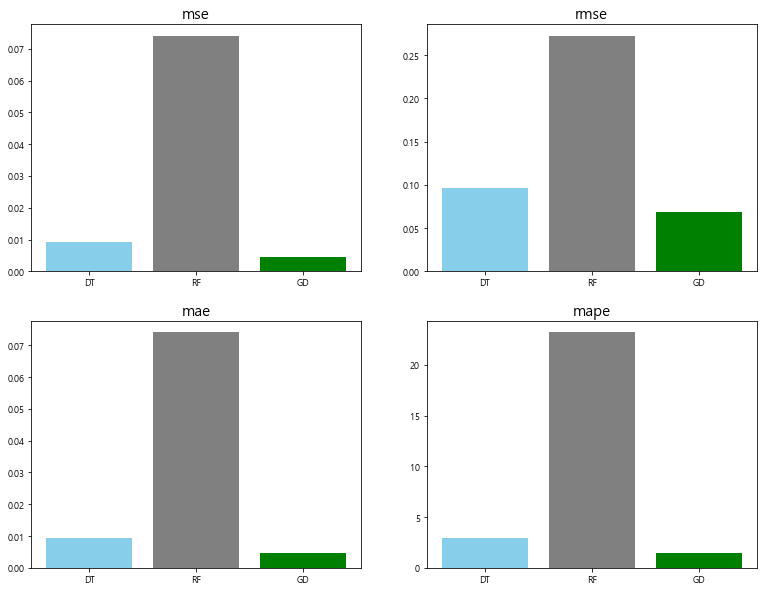

In [171]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse, color = ['skyblue', 'gray', 'green'])
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse, color = ['skyblue', 'gray', 'green'])
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae, color = ['skyblue', 'gray', 'green'])
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape, color = ['skyblue', 'gray', 'green'])
ax[1, 1].set_title("mape").set_fontsize(15)

- 그래디언트 부스팅 혹은 의사결정나무의 모델을 쓰는 것이 스케일 불량을 분류할때 가장 좋은 방법이다 . 